In [380]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [381]:
readfile=pd.read_csv("data.csv")
file=pd.DataFrame(readfile)

In [382]:
file.head()
print(file.dtypes)

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


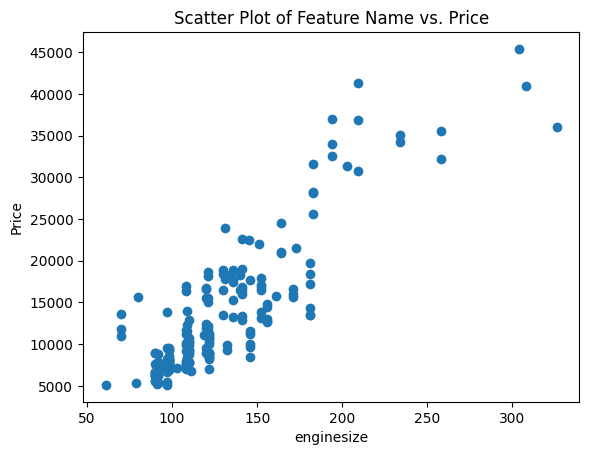

In [383]:
plt.scatter(file['enginesize'], file['price'])
plt.xlabel('enginesize')
plt.ylabel('Price')
plt.title('Scatter Plot of Feature Name vs. Price')
plt.show()


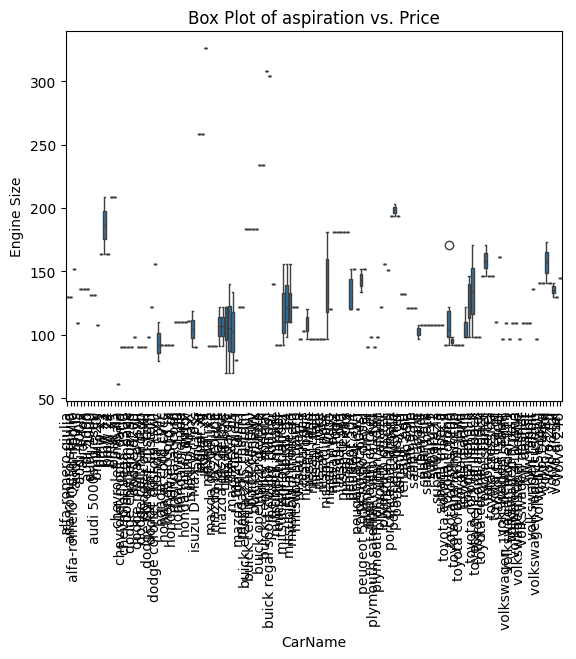

In [384]:
sns.boxplot(x='CarName', y='enginesize', data=file)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('CarName')
plt.ylabel('Engine Size')
plt.title('Box Plot of aspiration vs. Price')
plt.show()

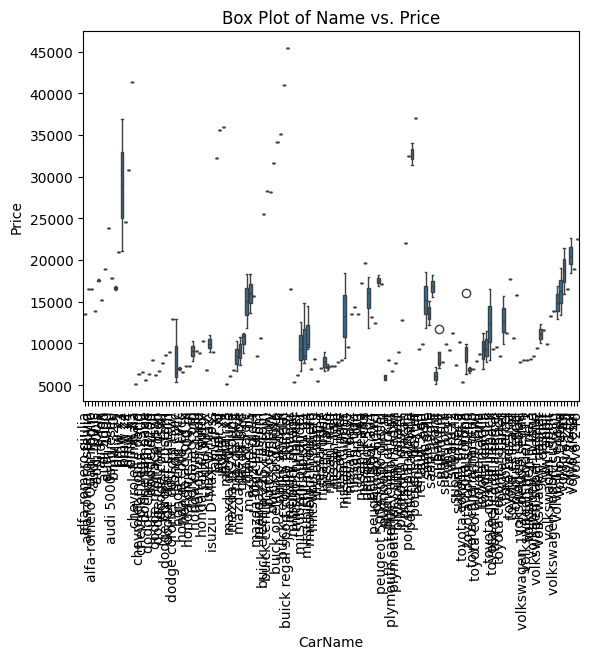

In [385]:
sns.boxplot(x='CarName', y='price', data=file)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('CarName')
plt.ylabel('Price')
plt.title('Box Plot of Name vs. Price')
plt.show()

In [386]:
file.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [387]:
file['fueltype'].value_counts()


fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [388]:
file['fueltype']=file['fueltype'].replace("gas",0).replace("diesel",1)

In [389]:
file['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [390]:
file['aspiration']=file['aspiration'].replace("std",0).replace("turbo",1)

In [391]:
file['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [392]:
file['doornumber']=file['doornumber'].replace("four",0).replace("two",1)

In [393]:
file['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [394]:
file['carbody']=file['carbody'].replace("sedan",0).replace("hatchback",1).replace("wagon",2).replace("hardtop",3).replace("convertible",4)



In [395]:
file['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [396]:
file['drivewheel']=file['drivewheel'].replace("fwd",0).replace("rwd",1).replace("4wd",2)

In [397]:
file['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [398]:
file['enginelocation']=file['enginelocation'].replace("front",0).replace("rear",1)

In [399]:
file['enginetype'].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [400]:
file['enginetype']=file['enginetype'].replace("ohc",0).replace("ohcf",1).replace("ohcv",2).replace("dohc",3).replace("l",4).replace("rotor",5).replace("dohcv",6)

In [401]:
file['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

In [402]:
file['cylindernumber']=file['cylindernumber'].replace("four",0).replace("six",1).replace("five",2).replace("eight",3).replace("two",4).replace("three",5).replace("twelve",6)

In [403]:
file['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [404]:
file['fuelsystem']=file['fuelsystem'].replace("mpfi",0).replace("2bbl",1).replace("idi",2).replace("1bbl",3).replace("spdi",4).replace("4bbl",5).replace("mfi",6).replace("spfi",7)

In [405]:
print(file.dtypes)

car_ID                int64
symboling             int64
CarName              object
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [406]:
file['CarName'].value_counts()

CarName
peugeot 504             6
toyota corolla          6
toyota corona           6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
jaguar xk               1
mercury cougar          1
Name: count, Length: 147, dtype: int64

In [407]:
pd.set_option('display.max_columns', None)
file.describe(include='all')
#No Missing Values

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,0.097561,0.180488,0.439024,0.819512,0.458537,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,0.736585,0.429268,126.907317,0.990244,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,0.297446,0.385535,0.497483,0.990944,0.581148,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,1.385810,0.990703,41.642693,1.306058,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,0.000000,0.000000,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,0.000000,0.000000,97.000000,0.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,0.000000,0.000000,120.000000,1.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,1.000000,0.000000,141.000000,1.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [408]:
#feature scaling
columns_to_normalize = (file.columns[1:2]).append(file.columns[3:25])
for column in columns_to_normalize:
    file[column] = (file[column] - file[column].min()) / (file[column].max() - file[column].min())

In [409]:
file.drop(columns=['CarName'], inplace=True)
file.drop(columns=['car_ID'], inplace=True)
independent=file.drop("price", axis=1)
dependent=file["price"]

In [410]:
independent_train, independent_test, dependent_train, dependent_test = train_test_split(independent, dependent, test_size=0.2, random_state=42)

In [411]:
X_train = independent_train.to_numpy()
y_train = dependent_train.to_numpy()
X_test = independent_test.to_numpy()
y_test = dependent_test.to_numpy()
independent_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
66,0.4,1.0,0.0,0.0,0.00,0.5,0.0,0.533528,0.505970,0.483333,0.550000,0.470132,0.000000,0.0,0.275472,0.285714,0.635714,0.747619,0.9375,0.100000,0.020408,0.500000,0.605263
111,0.4,0.0,0.0,0.0,0.00,0.5,0.0,0.620991,0.680597,0.675000,0.741667,0.615593,0.666667,0.0,0.222642,0.000000,0.657143,0.057143,0.0875,0.195833,0.346939,0.166667,0.210526
153,0.4,0.0,0.0,0.0,0.50,0.0,0.0,0.265306,0.426866,0.275000,0.941667,0.307215,0.000000,0.0,0.116981,0.142857,0.364286,0.457143,0.1250,0.058333,0.265306,0.500000,0.552632
96,0.6,0.0,0.0,0.0,0.00,0.0,0.0,0.230321,0.361194,0.291667,0.558333,0.187355,0.000000,0.0,0.135849,0.142857,0.435714,0.580952,0.1500,0.087500,0.428571,0.500000,0.552632
38,0.4,0.0,0.0,1.0,0.25,0.0,0.0,0.288630,0.394030,0.408333,0.458333,0.310706,0.000000,0.0,0.184906,0.428571,0.435714,0.719048,0.1250,0.158333,0.673469,0.388889,0.447368


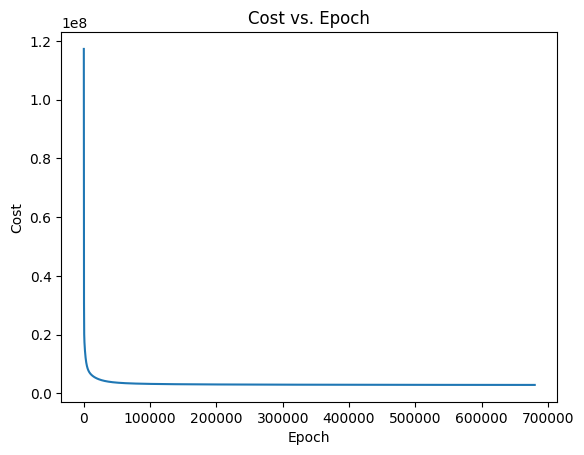

In [426]:
class LinearRegression:
    def __init__(self, learning_rate=0.0001, tolerance=0.1):
        #R2 greater a lower values such as 0.01 but the difference is too low to matter
        self.learning_rate = learning_rate
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.cost_history = []


    def fit(self, X, y):
        i=0
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        prev_cost = float('inf')

        while True:
            i=i+1
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            cost = (1 / (2 * n_samples)) * np.sum(error ** 2)
            self.cost_history.append(cost)
            if abs(prev_cost - cost) < self.tolerance:
                break
            prev_cost = cost



    def predict(self, X):
        predictions= np.dot(X, self.weights) + self.bias
        rounded_predictions = np.round(predictions, 2)
        return rounded_predictions  

    def r2_score(self, y, y_pred):
        y_mean = np.mean(y)
        tss = np.sum((y - y_mean) ** 2)
        rss = np.sum((y - y_pred) ** 2)
        r2 = 1 - (rss / tss)
        return r2

    def plot_cost_history(self):
        plt.plot(range(len(self.cost_history)), self.cost_history)
        plt.title('Cost vs. Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.show()

model = LinearRegression(learning_rate=0.001)
model.fit(X_train, y_train)
model.plot_cost_history()



In [425]:
y_pred = model.predict(X_test)
r2 = model.r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.8579315198843581
